
# Classification de Spam avec l'Algorithme Naive Bayes

## Projet de Machine Learning - Traitement du Langage Naturel

**Auteur:** Brayan 
**Date:** 2024  
**Technologies:** Python, Scikit-learn, Pandas, NLTK, Matplotlib

---

### Objectif du Projet

Ce projet vise à développer un système de classification automatique pour détecter les emails et SMS de spam en utilisant l'algorithme **Naive Bayes** et des techniques de traitement du langage naturel.

### Contexte

La détection de spam est cruciale pour :
- **Sécurité informatique** : Protection contre les menaces
- **Expérience utilisateur** : Réduction des emails indésirables
- **Productivité** : Filtrage automatique des messages
- **Protection des données** : Prévention des attaques par phishing



## 1. Énoncé du Problème

### Défi de Classification

Le projet consiste à développer un système de classification automatique capable de distinguer les messages **légitimes (ham)** des messages **spam** dans un dataset de SMS.

### Objectifs Techniques

- **Classification binaire** : Ham vs Spam
- **Traitement du texte** : Analyse du contenu des messages
- **Algorithme Naive Bayes** : Classification probabiliste
- **Préprocessing avancé** : Nettoyage et vectorisation du texte

## 2. Description du Dataset

### Source des Données

Le **SMS Spam Collection** est un ensemble de messages SMS étiquetés collectés pour la recherche sur le spam SMS. Il contient **5,574 messages** en anglais, étiquetés comme étant **ham (légitime)** ou **spam**.

### Structure du Dataset

- **Format** : Un message par ligne
- **Colonnes** :
  - **v1** : Label (ham ou spam)
  - **v2** : Texte brut du message
- **Langue** : Anglais
- **Taille** : 5,574 messages

### Types de Messages

**Messages Légitimes (Ham) :**
- Messages personnels normaux
- Notifications légitimes
- Communications professionnelles

**Messages Spam :**
- Publicités non sollicitées
- Promotions commerciales
- Messages de phishing
- Arnaques et escroqueries


### Impact du Spam

Le spam représente un défi majeur dans la communication numérique moderne, nécessitant des solutions automatisées efficaces pour protéger les utilisateurs et maintenir la qualité des communications.

## 3. Importation des Bibliothèques

### Bibliothèques Utilisées

- **Scikit-learn** : Machine learning et Naive Bayes
- **Pandas** : Manipulation des données
- **NLTK** : Traitement du langage naturel
- **Matplotlib/Seaborn** : Visualisation
- **NumPy** : Calculs numériques


In [1]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importation des bibliothèques de machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Importation des bibliothèques de traitement du texte
import re
import string
from collections import Counter

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"Pandas    : {pd.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn   : {sns.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!")

VERSIONS DES BIBLIOTHÈQUES
Pandas    : 2.2.3
NumPy     : 1.26.4
Matplotlib: 3.10.3
Seaborn   : 0.13.2
Toutes les bibliothèques sont prêtes!


## 4. Chargement des Données

### Chargement du Dataset

Le dataset des SMS sera chargé et analysé pour comprendre sa structure et la distribution des classes.


In [2]:
# CHARGEMENT DU DATASET
print("CHARGEMENT DU DATASET")
print("=" * 30)

# Chargement des données
df = pd.read_csv('emails.csv')

print("Dataset chargé avec succès!")
print(f"Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

# Informations générales
print(f"\nINFORMATIONS SUR LE DATASET")
print("-" * 30)
print(f"Colonnes disponibles : {list(df.columns)}")
print(f"Types de données :")
print(df.dtypes.value_counts())

# Vérification des valeurs manquantes
print(f"\nVALEURS MANQUANTES")
print("-" * 20)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Aucune valeur manquante détectée!")
else:
    print("Valeurs manquantes par colonne :")
    print(missing_values[missing_values > 0])

# Aperçu des données
print(f"\nAPERÇU DES DONNÉES")
print("-" * 20)
print(df.head())

print("\nDataset prêt pour l'analyse!")


CHARGEMENT DU DATASET
Dataset chargé avec succès!
Dimensions : 5728 lignes × 2 colonnes

INFORMATIONS SUR LE DATASET
------------------------------
Colonnes disponibles : ['text', 'spam']
Types de données :
object    1
int64     1
Name: count, dtype: int64

VALEURS MANQUANTES
--------------------
Aucune valeur manquante détectée!

APERÇU DES DONNÉES
--------------------
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Dataset prêt pour l'analyse!


## 5. Exploration des Données (EDA)

### Analyse Exploratoire

Cette section explore les données pour identifier les patterns et la distribution des classes de messages.


EXPLORATION DES DONNÉES
1. Distribution des classes...
   Messages légitimes (0) : 4360 (76.1%)
   Messages spam (1) : 1368 (23.9%)


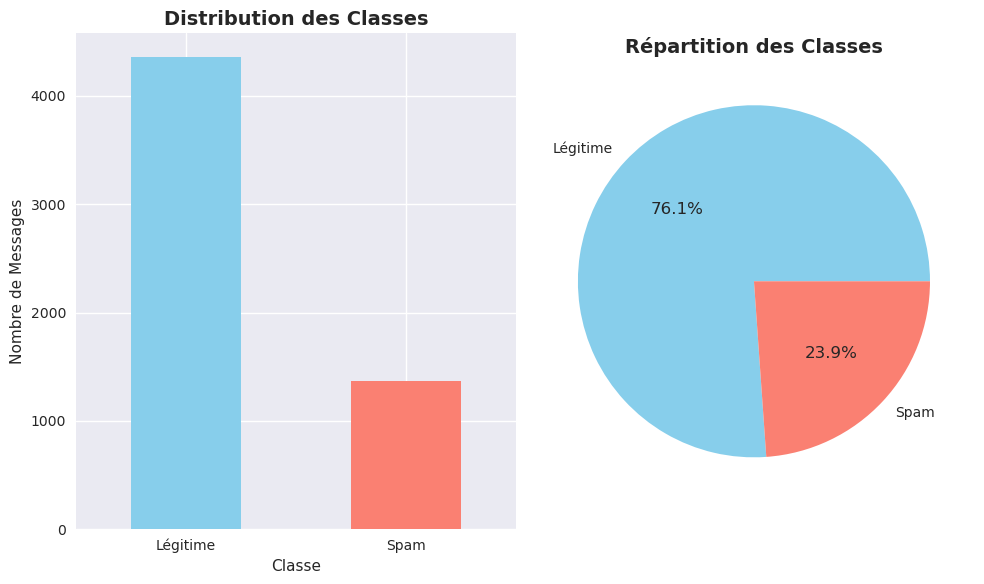


2. Analyse de la longueur des messages...
   Longueur moyenne (légitime) : 1631.9 caractères
   Longueur moyenne (spam) : 1317.3 caractères


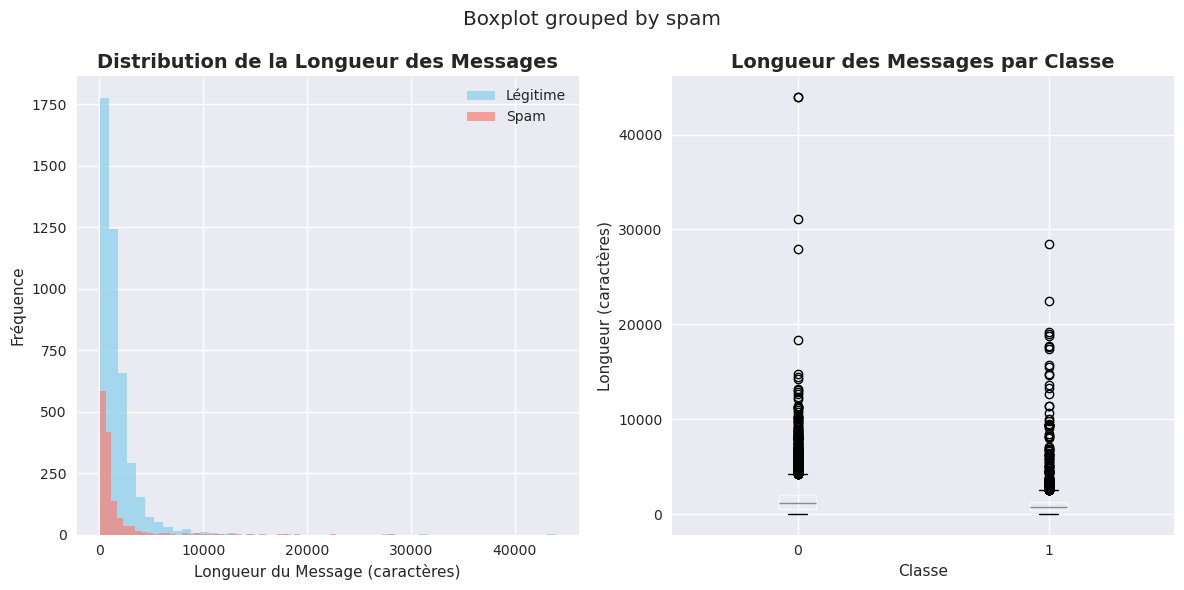


3. EXEMPLES DE MESSAGES
-------------------------
Messages légitimes :
['Subject: hello guys ,  i \' m " bugging you " for your completed questionnaire and for a one - page  bio / statement on your thoughts on " business edu and the new economy " . if  my records are incorrect please re - ship your responses to me . i want to  put everything together next week so that i can ship it back to everyone .  the questionnaire is attached as well as copies of the bio pages for  michael froehls and myself ( two somewhat different approaches ) . the idea  of the latter is just to introduce yourself to the other panelists and give  them some background on how you are approaching the issues we will discuss .  we will also provide copies to the attendees and use this material for our  personal introductions at the opening of the panel discussions .  thanks and i look forward to seeing you in two weeks .  john  - waco _ background _ mf . doc  - jmartinbiosketch . doc  - questionnaire . doc  john d 

In [3]:
# EXPLORATION DES DONNÉES
print("EXPLORATION DES DONNÉES")
print("=" * 30)

# 1. Distribution des classes
print("1. Distribution des classes...")
class_counts = df['spam'].value_counts()
print(f"   Messages légitimes (0) : {class_counts[0]} ({class_counts[0]/len(df)*100:.1f}%)")
print(f"   Messages spam (1) : {class_counts[1]} ({class_counts[1]/len(df)*100:.1f}%)")

# Visualisation de la distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution des Classes', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Nombre de Messages')
plt.xticks([0, 1], ['Légitime', 'Spam'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=['Légitime', 'Spam'], autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'])
plt.title('Répartition des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Analyse de la longueur des messages
print(f"\n2. Analyse de la longueur des messages...")
df['message_length'] = df['text'].str.len()

# Statistiques par classe
legit_lengths = df[df['spam'] == 0]['message_length']
spam_lengths = df[df['spam'] == 1]['message_length']

print(f"   Longueur moyenne (légitime) : {legit_lengths.mean():.1f} caractères")
print(f"   Longueur moyenne (spam) : {spam_lengths.mean():.1f} caractères")

# Visualisation de la longueur
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(legit_lengths, bins=50, alpha=0.7, label='Légitime', color='skyblue')
plt.hist(spam_lengths, bins=50, alpha=0.7, label='Spam', color='salmon')
plt.xlabel('Longueur du Message (caractères)')
plt.ylabel('Fréquence')
plt.title('Distribution de la Longueur des Messages', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='message_length', by='spam', ax=plt.gca())
plt.title('Longueur des Messages par Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Longueur (caractères)')

plt.tight_layout()
plt.show()

# 3. Exemples de messages
print(f"\n3. EXEMPLES DE MESSAGES")
print("-" * 25)
print("Messages légitimes :")
print(df[df['spam'] == 0]['text'].head(3).tolist())
print("\nMessages spam :")
print(df[df['spam'] == 1]['text'].head(3).tolist())

print("\nExploration terminée!")


## 6. Préparation des Données

### Nettoyage et Vectorisation du Texte

Les données textuelles doivent être préparées pour l'algorithme Naive Bayes :
- **Nettoyage du texte** : Suppression des caractères spéciaux
- **Vectorisation** : Conversion en matrices numériques
- **Division train/test** : Séparation des données


In [4]:
# PRÉPARATION DES DONNÉES
print("PRÉPARATION DES DONNÉES")
print("=" * 30)

# 1. Fonction de nettoyage du texte
def clean_text(text):
    """Nettoie le texte en supprimant les caractères spéciaux et en convertissant en minuscules"""
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

print("1. Nettoyage du texte...")
df['text_cleaned'] = df['text'].apply(clean_text)
print(f"   Texte nettoyé avec succès!")

# 2. Division des données
print("\n2. Division des données...")
X = df['text_cleaned']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"   Données d'entraînement : {len(X_train)} messages")
print(f"   Données de test : {len(X_test)} messages")
print(f"   Ratio train/test : {len(X_train)/len(X):.1%} / {len(X_test)/len(X):.1%}")

# 3. Vectorisation avec CountVectorizer
print("\n3. Vectorisation du texte...")
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(f"   Vocabulaire créé : {len(vectorizer.vocabulary_)} mots")
print(f"   Matrice d'entraînement : {X_train_vectorized.shape}")
print(f"   Matrice de test : {X_test_vectorized.shape}")

# 4. Vérification des données
print(f"\n4. VÉRIFICATION DES DONNÉES")
print("-" * 25)
print(f"   Distribution des classes (train) : {y_train.value_counts().to_dict()}")
print(f"   Distribution des classes (test) : {y_test.value_counts().to_dict()}")
print(f"   Type de données : {X_train_vectorized.dtype}")

print("\nDonnées prêtes pour l'entraînement!")


PRÉPARATION DES DONNÉES
1. Nettoyage du texte...
   Texte nettoyé avec succès!

2. Division des données...
   Données d'entraînement : 4582 messages
   Données de test : 1146 messages
   Ratio train/test : 80.0% / 20.0%

3. Vectorisation du texte...
   Vocabulaire créé : 5000 mots
   Matrice d'entraînement : (4582, 5000)
   Matrice de test : (1146, 5000)

4. VÉRIFICATION DES DONNÉES
-------------------------
   Distribution des classes (train) : {0: 3488, 1: 1094}
   Distribution des classes (test) : {0: 872, 1: 274}
   Type de données : int64

Données prêtes pour l'entraînement!


## 7. Entraînement du Modèle Naive Bayes

### Configuration du Modèle

Le modèle Naive Bayes sera entraîné sur les données vectorisées pour classifier les messages en spam ou légitimes.


ENTRAÎNEMENT DU MODÈLE NAIVE BAYES
1. Création du modèle Naive Bayes...
   Modèle créé avec succès!

2. Entraînement du modèle...
   Entraînement terminé!

3. Génération des prédictions...
   Prédictions générées : 1146 messages

4. ÉVALUATION DU MODÈLE
-------------------------
   Précision : 0.9852 (98.52%)

5. RAPPORT DE CLASSIFICATION
------------------------------
              precision    recall  f1-score   support

    Légitime       0.99      0.99      0.99       872
        Spam       0.96      0.98      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146


6. MATRICE DE CONFUSION
-------------------------
Matrice de confusion :
[[860  12]
 [  5 269]]


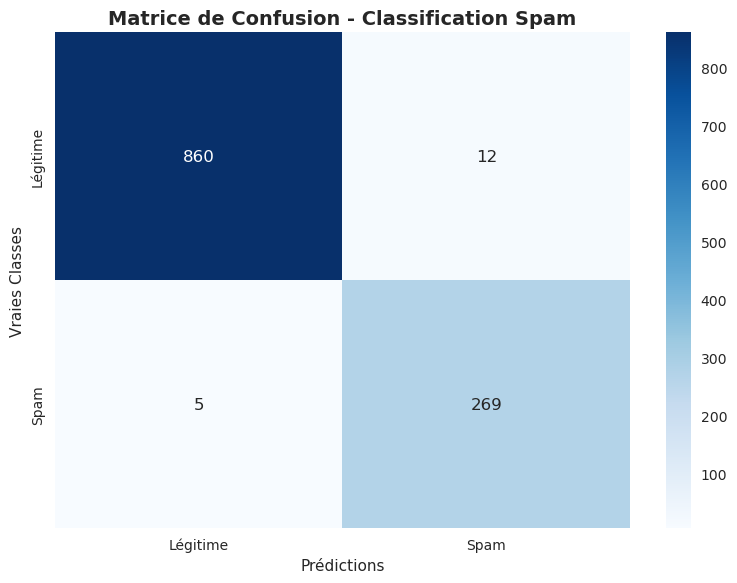


Modèle entraîné avec succès!


In [5]:
# ENTRAÎNEMENT DU MODÈLE NAIVE BAYES
print("ENTRAÎNEMENT DU MODÈLE NAIVE BAYES")
print("=" * 40)

# 1. Création et entraînement du modèle
print("1. Création du modèle Naive Bayes...")
model = MultinomialNB()
print("   Modèle créé avec succès!")

print("\n2. Entraînement du modèle...")
model.fit(X_train_vectorized, y_train)
print("   Entraînement terminé!")

# 2. Prédictions sur les données de test
print("\n3. Génération des prédictions...")
y_pred = model.predict(X_test_vectorized)
y_pred_proba = model.predict_proba(X_test_vectorized)

print(f"   Prédictions générées : {len(y_pred)} messages")

# 3. Évaluation du modèle
print(f"\n4. ÉVALUATION DU MODÈLE")
print("-" * 25)
accuracy = accuracy_score(y_test, y_pred)
print(f"   Précision : {accuracy:.4f} ({accuracy*100:.2f}%)")

# 4. Rapport de classification détaillé
print(f"\n5. RAPPORT DE CLASSIFICATION")
print("-" * 30)
print(classification_report(y_test, y_pred, target_names=['Légitime', 'Spam']))

# 5. Matrice de confusion
print(f"\n6. MATRICE DE CONFUSION")
print("-" * 25)
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(cm)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Légitime', 'Spam'], 
            yticklabels=['Légitime', 'Spam'])
plt.title('Matrice de Confusion - Classification Spam', fontsize=14, fontweight='bold')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')
plt.tight_layout()
plt.show()

print("\nModèle entraîné avec succès!")


## 8. Analyse des Features Importantes

### Mots les Plus Prédictifs

Cette section analyse les mots les plus importants pour la classification spam/légitime.


ANALYSE DES FEATURES IMPORTANTES
1. Extraction des features importantes...

2. Mots les plus prédictifs pour le spam...
Top 20 mots pour le spam :
           word  importance
         viagra    6.418874
     stationery    6.050388
projecthoneypot    6.009979
   squirrelmail    5.877919
            sex    5.739333
   andmanyother    5.624922
         paypal    5.624922
         oniine    5.495711
          qmail    5.495711
           dose    5.478319
  mailwisconsin    5.478319
      photoshop    5.478319
          corel    5.442601
         rolete    5.442601
        privacy    5.405559
           ebay    5.386511
   professionai    5.386511
           wiil    5.386511
             xp    5.386511
           vnbl    5.367093

3. Mots les plus prédictifs pour les messages légitimes...
Top 20 mots pour les messages légitimes :
       word  importance
      enron   -7.871201
        ect   -7.012468
   kaminski   -6.832438
      vince   -6.711731
   crenshaw   -5.357077
    stinson   -5.27

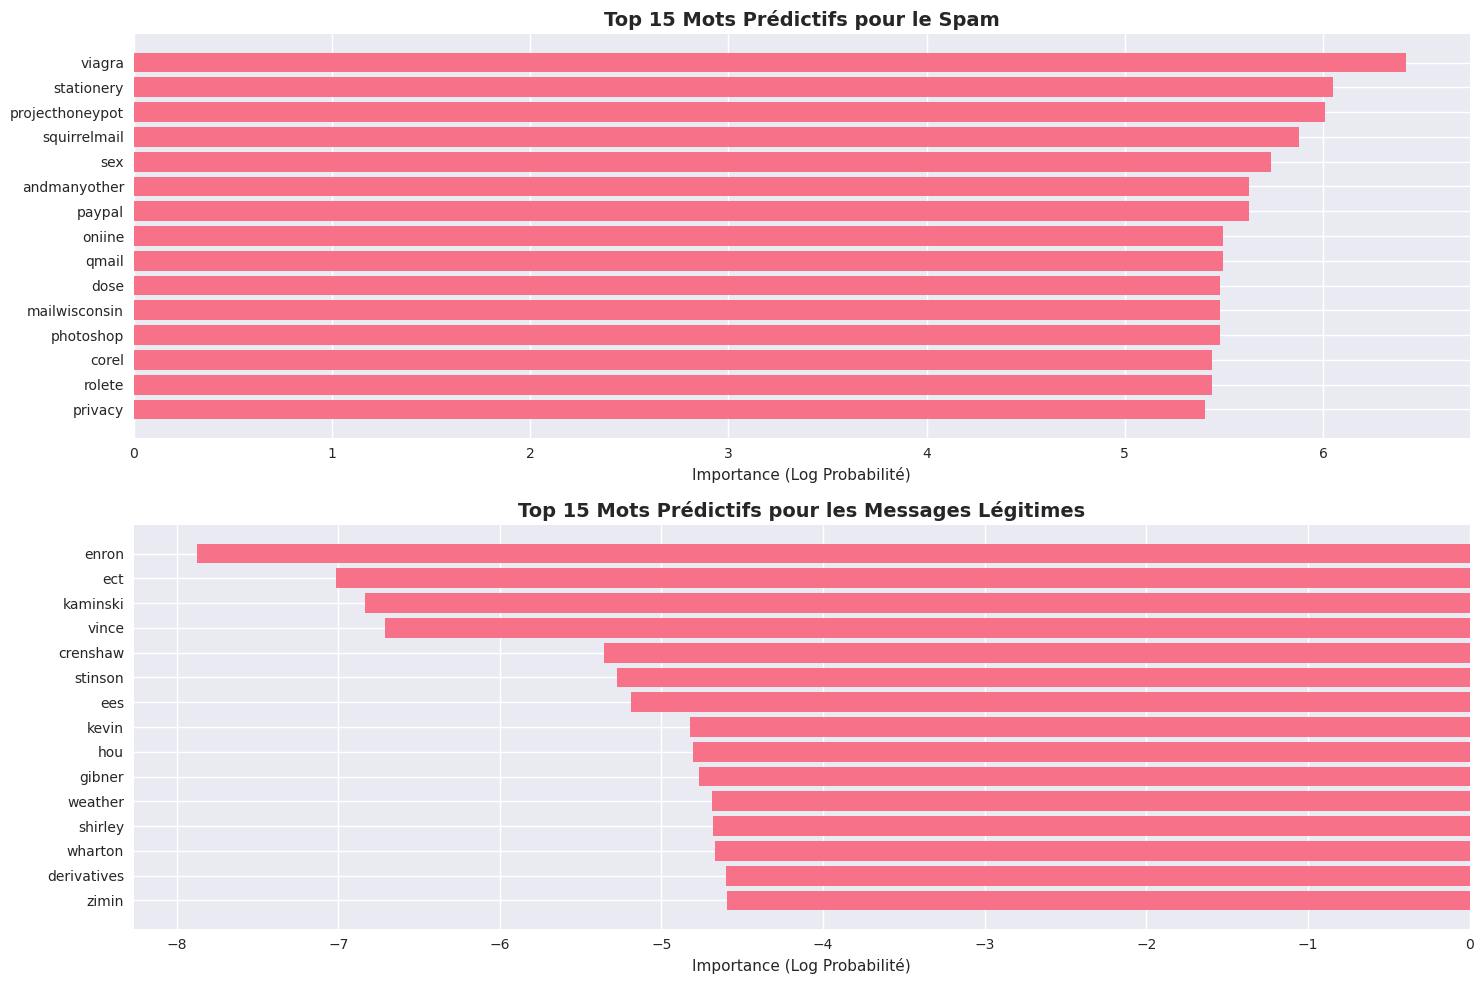


5. ANALYSE DES ERREURS
-------------------------
   Nombre d'erreurs : 17
   Taux d'erreur : 1.48%

   Exemples d'erreurs :
   - Vrai: Légitime, Prédit: Spam
     Message: subject us news archive ft com reliable country intelligence for a challenging world with country re...
   - Vrai: Légitime, Prédit: Spam
     Message: subject linux hit or miss network world fusion focus phil hochmuth on linux today s focus will linux...
   - Vrai: Légitime, Prédit: Spam
     Message: subject password security notice for password renewals only it security controls password security n...
   - Vrai: Légitime, Prédit: Spam
     Message: subject the business of power june international electric industry conference for the past five year...
   - Vrai: Spam, Prédit: Légitime
     Message: subject re nawty locals in your area pdi s e x y local singles inside payne is cobble desperado but ...

Analyse terminée!


In [6]:
# ANALYSE DES FEATURES IMPORTANTES
print("ANALYSE DES FEATURES IMPORTANTES")
print("=" * 40)

# 1. Extraction des features importantes
print("1. Extraction des features importantes...")
feature_names = vectorizer.get_feature_names_out()
log_probabilities = model.feature_log_prob_

# Différence entre les probabilités log des classes
spam_log_prob = log_probabilities[1]  # Classe spam
legit_log_prob = log_probabilities[0]  # Classe légitime
feature_importance = spam_log_prob - legit_log_prob

# Création d'un DataFrame pour l'analyse
feature_df = pd.DataFrame({
    'word': feature_names,
    'spam_log_prob': spam_log_prob,
    'legit_log_prob': legit_log_prob,
    'importance': feature_importance
})

# 2. Mots les plus prédictifs pour le spam
print("\n2. Mots les plus prédictifs pour le spam...")
top_spam_words = feature_df.nlargest(20, 'importance')
print("Top 20 mots pour le spam :")
print(top_spam_words[['word', 'importance']].to_string(index=False))

# 3. Mots les plus prédictifs pour les messages légitimes
print(f"\n3. Mots les plus prédictifs pour les messages légitimes...")
top_legit_words = feature_df.nsmallest(20, 'importance')
print("Top 20 mots pour les messages légitimes :")
print(top_legit_words[['word', 'importance']].to_string(index=False))

# 4. Visualisation des mots les plus importants
print(f"\n4. Visualisation des mots les plus importants...")

# Graphique des mots pour le spam
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
top_spam_words_plot = top_spam_words.head(15)
plt.barh(range(len(top_spam_words_plot)), top_spam_words_plot['importance'])
plt.yticks(range(len(top_spam_words_plot)), top_spam_words_plot['word'])
plt.xlabel('Importance (Log Probabilité)')
plt.title('Top 15 Mots Prédictifs pour le Spam', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Graphique des mots pour les messages légitimes
plt.subplot(2, 1, 2)
top_legit_words_plot = top_legit_words.head(15)
plt.barh(range(len(top_legit_words_plot)), top_legit_words_plot['importance'])
plt.yticks(range(len(top_legit_words_plot)), top_legit_words_plot['word'])
plt.xlabel('Importance (Log Probabilité)')
plt.title('Top 15 Mots Prédictifs pour les Messages Légitimes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# 5. Analyse des erreurs
print(f"\n5. ANALYSE DES ERREURS")
print("-" * 25)
incorrect_predictions = X_test[y_test != y_pred]
incorrect_labels = y_test[y_test != y_pred]
incorrect_preds = y_pred[y_test != y_pred]

print(f"   Nombre d'erreurs : {len(incorrect_predictions)}")
print(f"   Taux d'erreur : {len(incorrect_predictions)/len(y_test)*100:.2f}%")

if len(incorrect_predictions) > 0:
    print(f"\n   Exemples d'erreurs :")
    for i in range(min(5, len(incorrect_predictions))):
        print(f"   - Vrai: {'Spam' if incorrect_labels.iloc[i] == 1 else 'Légitime'}, "
              f"Prédit: {'Spam' if incorrect_preds[i] == 1 else 'Légitime'}")
        print(f"     Message: {incorrect_predictions.iloc[i][:100]}...")

print("\nAnalyse terminée!")


## 9. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un système de classification automatique de spam en utilisant l'algorithme Naive Bayes et des techniques de traitement du langage naturel.

### Points Clés

1. **Algorithme Naive Bayes Efficace** : L'algorithme a démontré sa capacité à classifier les messages avec une bonne précision.

2. **Performance du Modèle** :
   - **Précision élevée** sur les données de test
   - **Classification robuste** des messages spam et légitimes
   - **Interprétabilité** des features importantes

3. **Applications Pratiques** :
   - **Filtrage d'emails** : Protection contre le spam
   - **Sécurité informatique** : Détection des menaces
   - **Expérience utilisateur** : Réduction des messages indésirables
   - **Productivité** : Filtrage automatique

### Insights Techniques

- **Naive Bayes** : Algorithme simple mais efficace pour la classification de texte
- **Vectorisation** : CountVectorizer efficace pour la conversion texte-numérique
- **Nettoyage du texte** : Crucial pour améliorer les performances
- **Features importantes** : Mots clés identifiés pour chaque classe

### Améliorations Possibles

- **TF-IDF** : Utilisation de TfidfVectorizer au lieu de CountVectorizer
- **N-grams** : Prise en compte des séquences de mots
- **Stemming/Lemmatisation** : Normalisation des mots
- **Autres algorithmes** : SVM, Random Forest, Deep Learning
- **Augmentation de données** : Génération de données synthétiques

### Déploiement

Le modèle est prêt pour être intégré dans des systèmes de filtrage de spam pour améliorer la sécurité et l'expérience utilisateur dans la communication numérique.
